In [6]:
#!/usr/bin/env python3
"""
Data from “CFPB Open Tech Consumer Financial Protection Burea Consumer Complaint Database 2019”, 
Accessed from: 'https://cfpb.github.io/api/ccdb/fields.html'

Input: csv file in input folder: complaints.csv 
Output: csv file in output folder: report.csv


Each line in the output file should list the following fields in the following order:

Expected output:

-product (name should be written in all lowercase)
-year
-total number of complaints received for that product and year
-total number of companies receiving at least one complaint for that product and year
-highest percentage (rounded to the nearest whole number) of total complaints filed 
against one company for that product and year. 

Use standard rounding conventions (i.e.,
Any percentage between 0.5% and 1%, inclusive, should round to 1% and anything less than
0.5% should round to 0%)
"""

"\nData from “CFPB Open Tech Consumer Financial Protection Burea Consumer Complaint Database 2019”, \nAccessed from: 'https://cfpb.github.io/api/ccdb/fields.html'\n\nInput: csv file in input folder: complaints.csv \nOutput: csv file in output folder: report.csv\n\n\nEach line in the output file should list the following fields in the following order:\n\nExpected output:\n\n-product (name should be written in all lowercase)\n-year\n-total number of complaints received for that product and year\n-total number of companies receiving at least one complaint for that product and year\n-highest percentage (rounded to the nearest whole number) of total complaints filed \nagainst one company for that product and year. \n\nUse standard rounding conventions (i.e.,\nAny percentage between 0.5% and 1%, inclusive, should round to 1% and anything less than\n0.5% should round to 0%)\n"

# 1. Importing the required libraries for EDA

In [7]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)


# 2. Loading the data into the data frame.


In [8]:
df = pd.read_csv('/Users/LM/DataScience/Consumer_Complaint_Database /Input Data/complaints.csv')
df.head(5)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,NaN,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,NaN,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,NaN,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,NaN,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,NaN,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


In [9]:
# To display the bottom 5 rows
df.tail(5) 


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
1552468,2016-07-11,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I was on automatic payment for my car loan. In...,NaN,NISSAN MOTOR ACCEPTANCE CORPORATION,IL,607XX,NaN,Consent provided,Web,2016-07-11,Closed with explanation,Yes,No,2007463
1552469,2017-01-24,Debt collection,I do not know,Communication tactics,Threatened to take legal action,I recieved a collections call from an unknown ...,Company has responded to the consumer and the ...,"CMRE Financial Services, Inc.",CA,917XX,NaN,Consent provided,Web,2017-01-24,Closed with explanation,Yes,No,2308954
1552470,2015-03-26,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,"On XXXX XXXX, 2015, I contacted XXXX XXXX, who...",NaN,Finance of America Mortgage LLC,CA,925XX,NaN,Consent provided,Web,2015-03-26,Closed with monetary relief,Yes,No,1303324
1552471,2015-12-12,Mortgage,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,I can not get from chase who services my mortg...,NaN,JPMORGAN CHASE & CO.,NY,110XX,NaN,Consent provided,Web,2015-12-12,Closed with explanation,Yes,No,1694674
1552472,2016-08-09,Credit card,NaN,Transaction issue,NaN,I made a payment to CITI XXXX Credit Card on X...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",WI,NaN,NaN,Consent provided,Web,2016-08-09,Closed with non-monetary relief,Yes,No,2053487


# 3. Checking the types of data

In [10]:
# Checking the data type
df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [11]:
# Total number of rows and columns
df.shape

(1552473, 18)

In [12]:
# df.info()
df.Tags.unique()

array([nan, 'Servicemember', 'Older American',
       'Older American, Servicemember'], dtype=object)

# 4. Dropping irrelevant columns


In [13]:
# Dropping irrelevant columns
df = df.drop(['Tags'], axis=1)
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


# 5. Dropping the duplicate rows

In [14]:
# Total number of rows and columns
df.shape



(1552473, 17)

In [15]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 17)


In [16]:
# Used to count the number of rows before removing the data
df.count() 

Date received                   1552473
Product                         1552473
Sub-product                     1317308
Issue                           1552473
Sub-issue                        988611
Consumer complaint narrative     513391
Company public response          588489
Company                         1552473
State                           1526176
ZIP code                        1405577
Consumer consent provided?       925625
Submitted via                   1552473
Date sent to company            1552473
Company response to consumer    1552472
Timely response?                1552473
Consumer disputed?               768478
Complaint ID                    1552473
dtype: int64

# 6. Renaming the columns


In [17]:
# Renaming the column names
df = df.rename(columns={"Product": "product", "Date received": "year",
       'Consumer complaint narrative':'Consumer_complaint_narrative', 'Company public response': 'Company_public_response',
        'ZIP code':'ZIP_code', 'Consumer consent provided?':'Consumer_consent_provided?', 'Submitted via': 'Submitted_via',
       'Date sent to company': 'Date_sent_to_company', 'Company response to consumer': 'Company response to consumer',
       'Timely response?' : 'Timely_response?', 'Consumer disputed?':'Consumer_disputed?', 'Complaint ID' : 'Complaint_ID'})
df.head(5)

,year,product,Sub-product,Issue,Sub-issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Consumer_consent_provided?,Submitted_via,Date_sent_to_company,Company response to consumer,Timely_response?,Consumer_disputed?,Complaint_ID
0,2019-09-24,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,transworld systems inc. \nis trying to collect...,NaN,TRANSWORLD SYSTEMS INC,FL,335XX,Consent provided,Web,2019-09-24,Closed with explanation,Yes,NaN,3384392
1,2019-09-19,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,PA,15206,Consent not provided,Web,2019-09-20,Closed with non-monetary relief,Yes,NaN,3379500
2,2019-10-25,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,I would like to request the suppression of the...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",CA,937XX,Consent provided,Web,2019-10-25,Closed with explanation,Yes,NaN,3417821
3,2019-11-08,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,"Over the past 2 weeks, I have been receiving e...",NaN,"Diversified Consultants, Inc.",NC,275XX,Consent provided,Web,2019-11-08,Closed with explanation,Yes,NaN,3433198
4,2019-02-08,Vehicle loan or lease,Lease,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,HYUNDAI CAPITAL AMERICA,FL,33161,Consent not provided,Web,2019-02-08,Closed with non-monetary relief,Yes,NaN,3146310


# 7. Dropping the missing or null values.

In [18]:
# Finding the null values.
print(df.isnull().sum())


year                                  0
product                               0
Sub-product                      235165
Issue                                 0
Sub-issue                        563862
Consumer_complaint_narrative    1039082
Company_public_response          963984
Company                               0
State                             26297
ZIP_code                         146896
Consumer_consent_provided?       626848
Submitted_via                         0
Date_sent_to_company                  0
Company response to consumer          1
Timely_response?                      0
Consumer_disputed?               783995
Complaint_ID                          0
dtype: int64


# 8. Plot different features against one another (scatter), against frequency (histogram)

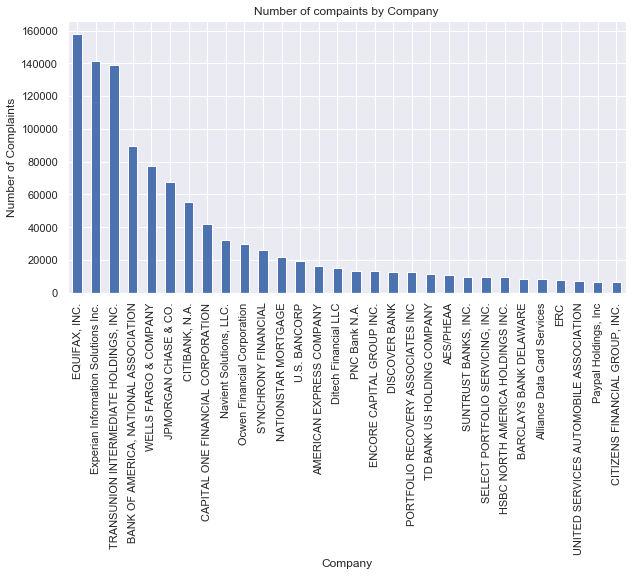

In [19]:
# Plotting a Histogram
df.Company.value_counts().nlargest(30).plot(kind='bar', figsize=(10,5))
plt.title('Number of compaints by Company')
plt.ylabel('Number of Complaints')
plt.xlabel('Company');

# 9. Make Queries with PandaSQL

In [20]:
import pandas as pd
from pandasql import sqldf

from datetime import datetime

%matplotlib inline

In [21]:
df.columns

Index(['year', 'product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Consumer_consent_provided?', 'Submitted_via',
       'Date_sent_to_company', 'Company response to consumer',
       'Timely_response?', 'Consumer_disputed?', 'Complaint_ID'],
      dtype='object')

In [22]:
#Convert df['year'] from string to datetime
pd.to_datetime(df['year'])

0         2019-09-24
1         2019-09-19
2         2019-10-25
3         2019-11-08
4         2019-02-08
             ...    
1552468   2016-07-11
1552469   2017-01-24
1552470   2015-03-26
1552471   2015-12-12
1552472   2016-08-09
Name: year, Length: 1552473, dtype: datetime64[ns]

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
pysqldf = lambda q: sqldf(q, globals())



# Complaints in years

In [25]:
q = """SELECT  product, strftime('%Y', year) AS year , COUNT(Complaint_ID) AS Total_Number_of_Complaints
       FROM df 
       GROUP BY strftime('%Y', year)
       ORDER BY product DESC;
       """

In [26]:
pysqldf(q)

,product,year,Total_Number_of_Complaints
0,Mortgage,2018,257317
1,Mortgage,2013,108217
2,Mortgage,2012,72373
3,Debt collection,2019,277393
4,Debt collection,2016,191469
5,Debt collection,2015,168475
6,Debt collection,2014,153043
7,"Credit reporting, credit repair services, or o...",2020,78683
8,"Credit reporting, credit repair services, or o...",2017,242967
9,Credit card,2011,2536


In [27]:
q = """SELECT  product , COUNT(Complaint_ID) AS Number_of_complaints
       FROM df 
       GROUP BY product;
       """

In [28]:
pysqldf(q)

,product,Number_of_complaints
0,Bank account or service,86206
1,Checking or savings account,60736
2,Consumer Loan,31604
3,Credit card,89190
4,Credit card or prepaid card,72350
5,Credit reporting,140432
6,"Credit reporting, credit repair services, or o...",368381
7,Debt collection,287591
8,"Money transfer, virtual currency, or money ser...",14962
9,Money transfers,5354


# 1. Total number of complaints received for that product and year

In [29]:
q2 = """SELECT  product, strftime('%Y', year) AS year , COUNT( Company) AS Total_Number_of_Companies
       FROM df 
       GROUP BY product , strftime('%Y', year)
       ORDER BY Total_Number_of_Companies DESC LIMIT 200;
       """

In [30]:
df2 = pysqldf(q2)

# 2. Total number of companies receiving at least one complaint for that product and year

In [105]:
q1 = """SELECT  product, strftime('%Y', year) AS year , Count(Complaint_ID) as noOfComplaints
       FROM df 
       GROUP BY product , year
       ORDER BY noOfComplaints DESC;
       """

In [106]:

df1 = pysqldf(q1)

,product,year,noOfComplaints
0,"Credit reporting, credit repair services, or o...",2017,3101
1,"Credit reporting, credit repair services, or o...",2017,2498
2,Student loan,2017,1318
3,"Credit reporting, credit repair services, or o...",2017,1050
4,Student loan,2017,981
...,...,...,...
26186,Virtual currency,2016,1
26187,Virtual currency,2016,1
26188,Virtual currency,2017,1
26189,Virtual currency,2017,1


# 3.highest percentage (rounded to the nearest whole number) of total complaints filed against one company for that product and year.

In [116]:
q3 = """SELECT product , strftime('%Y', year) AS year , Company ,   sum(Complaint_ID) as TotalComplaintsPerCompany 
from df 
group by Product , year, Company ;"""

In [134]:
q3 = """WITH t1 AS 
 (SELECT product , strftime('%Y', year) AS year , Company, SUM(Complaint_ID) AS n 
  FROM df
  GROUP BY Product , year, Company)
SELECT Product , year, Company, n, (count(*) / n ) * 100 as Percent 
FROM t1 GROUP BY Product , year, Company ;"""

In [135]:
df3 = pysqldf(q3)

,product,year,Company,n,Percent
0,Bank account or service,2012,ACS Education Services,135038,0
1,Bank account or service,2012,ALLY FINANCIAL INC.,30358,0
2,Bank account or service,2012,AMERICAN EXPRESS COMPANY,29967,0
3,Bank account or service,2012,"ARVEST BANK GROUP, INC.",35676,0
4,Bank account or service,2012,ASSOCIATED BANC-CORP,57611,0
...,...,...,...,...,...
38451,Virtual currency,2014,"Coinbase, Inc.",986342,0
38452,Virtual currency,2015,"Coinbase, Inc.",1316515,0
38453,Virtual currency,2016,Circle Internet Financial,1825707,0
38454,Virtual currency,2016,"Coinbase, Inc.",1851705,0
